In [2]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=5, repr.plot.height=5)

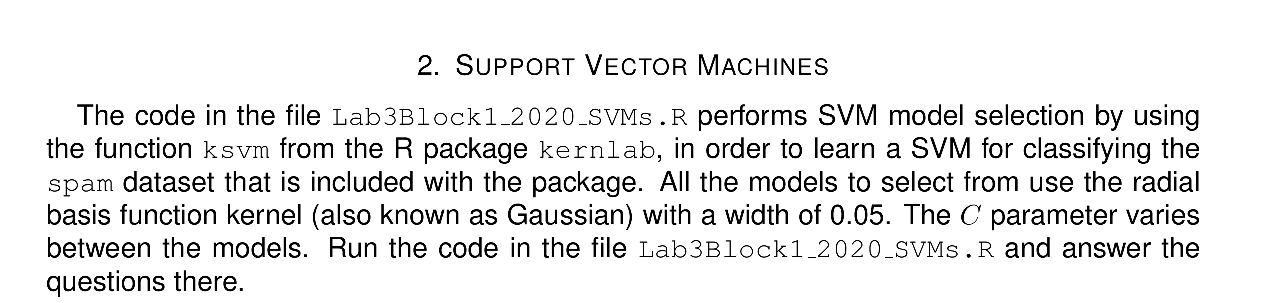

In [5]:
library(kernlab)
set.seed(1234567890)

data(spam)

index <- sample(1:4601)


tr <- spam[index[1:3000], ]

va <- spam[index[3001:3800], ]
trva <- spam[index[1:3800], ]
te <- spam[index[3801:4601], ]

by <- 0.3
err_va <- NULL
for(i in seq(by,5,by)){
  filter <- ksvm(type~.,data=tr,kernel="rbfdot",kpar=list(sigma=0.05),C=i)
  mailtype <- predict(filter,va[,-58])
  t <- table(mailtype,va[,58])
  err_va <-c(err_va,(t[1,2]+t[2,1])/sum(t))
}

In [6]:
filter0 <- ksvm(type~.,data=tr,kernel="rbfdot",kpar=list(sigma=0.05),C=which.min(err_va)*by)
filter0
mailtype <- predict(filter0,va[,-58])
t <- table(mailtype,va[,58])
err0 <- (t[1,2]+t[2,1])/sum(t)
err0
caret::confusionMatrix(t)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1.2 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.05 

Number of Support Vectors : 1171 

Objective Function Value : -608.1047 
Training error : 0.036 

[1] 0.07

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Confusion Matrix and Statistics

         
mailtype  nonspam spam
  nonspam     479   35
  spam         21  265
                                          
               Accuracy : 0.93            
                 95% CI : (0.9101, 0.9467)
    No Information Rate : 0.625           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8493          
                                          
 Mcnemar's Test P-Value : 0.08235         
                                          
            Sensitivity : 0.9580          
            Specificity : 0.8833          
         Pos Pred Value : 0.9319          
         Neg Pred Value : 0.9266          
             Prevalence : 0.6250          
         Detection Rate : 0.5988          
   Detection Prevalence : 0.6425          
      Balanced Accuracy : 0.9207          
                                          
       'Positive' Class : nonspam         
                            

In filter0, trainind data is tr and predict is on va[,-58]. Number of Support vector: 1171, Training error:0.036, miss classification error: 0.07 , Accuracy : 0.93, Sensitivity is :0.9580(TRP)


In [7]:
filter1 <- ksvm(type~.,data=tr,kernel="rbfdot",kpar=list(sigma=0.05),C=which.min(err_va)*by)
filter1
mailtype <- predict(filter1,te[,-58])
t <- table(mailtype,te[,58])
err1 <- (t[1,2]+t[2,1])/sum(t)
err1
caret::confusionMatrix(t)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1.2 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.05 

Number of Support Vectors : 1171 

Objective Function Value : -608.1047 
Training error : 0.036 

[1] 0.08489388

Confusion Matrix and Statistics

         
mailtype  nonspam spam
  nonspam     446   50
  spam         18  287
                                          
               Accuracy : 0.9151          
                 95% CI : (0.8936, 0.9335)
    No Information Rate : 0.5793          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8235          
                                          
 Mcnemar's Test P-Value : 0.0001704       
                                          
            Sensitivity : 0.9612          
            Specificity : 0.8516          
         Pos Pred Value : 0.8992          
         Neg Pred Value : 0.9410          
             Prevalence : 0.5793          
         Detection Rate : 0.5568          
   Detection Prevalence : 0.6192          
      Balanced Accuracy : 0.9064          
                                          
       'Positive' Class : nonspam         
                            

In filter1, trainind data is tr and predict is on te[,-58]. Number of Support vector: 1171, Training error:0.036, miss classificatio error:0.084, Accuracy : 0.9151, Sensitivity: 0.9612 that is TRP.

In [8]:
filter2 <- ksvm(type~.,data=trva,kernel="rbfdot",kpar=list(sigma=0.05),C=which.min(err_va)*by)
filter2
mailtype <- predict(filter2,te[,-58])
t <- table(mailtype,te[,58])
err2 <- (t[1,2]+t[2,1])/sum(t)
err2
caret::confusionMatrix(t)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1.2 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.05 

Number of Support Vectors : 1406 

Objective Function Value : -752.2024 
Training error : 0.039737 

[1] 0.08364544

Confusion Matrix and Statistics

         
mailtype  nonspam spam
  nonspam     446   49
  spam         18  288
                                         
               Accuracy : 0.9164         
                 95% CI : (0.895, 0.9346)
    No Information Rate : 0.5793         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8262         
                                         
 Mcnemar's Test P-Value : 0.0002473      
                                         
            Sensitivity : 0.9612         
            Specificity : 0.8546         
         Pos Pred Value : 0.9010         
         Neg Pred Value : 0.9412         
             Prevalence : 0.5793         
         Detection Rate : 0.5568         
   Detection Prevalence : 0.6180         
      Balanced Accuracy : 0.9079         
                                         
       'Positive' Class : nonspam        
                                         

In filter2, trainind data is trva and predict is on te[,-58]. Number of Support vector: 1406, Training error:0.0836, miss classification error:0.08364, Accuracy : 0.9164, Sensitivity:09612

In [9]:
filter3 <- ksvm(type~.,data=spam,kernel="rbfdot",kpar=list(sigma=0.05),C=which.min(err_va)*by)
filter3
mailtype <- predict(filter3,te[,-58])
t <- table(mailtype,te[,58])
err3 <- (t[1,2]+t[2,1])/sum(t)
err3
caret::confusionMatrix(t)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1.2 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.05 

Number of Support Vectors : 1640 

Objective Function Value : -892.1984 
Training error : 0.038035 

[1] 0.03370787

Confusion Matrix and Statistics

         
mailtype  nonspam spam
  nonspam     457   20
  spam          7  317
                                          
               Accuracy : 0.9663          
                 95% CI : (0.9513, 0.9777)
    No Information Rate : 0.5793          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9305          
                                          
 Mcnemar's Test P-Value : 0.02092         
                                          
            Sensitivity : 0.9849          
            Specificity : 0.9407          
         Pos Pred Value : 0.9581          
         Neg Pred Value : 0.9784          
             Prevalence : 0.5793          
         Detection Rate : 0.5705          
   Detection Prevalence : 0.5955          
      Balanced Accuracy : 0.9628          
                                          
       'Positive' Class : nonspam         
                            

In filter3, trained data is spam and predict is on te[,-58]. Number of Support vector: 1640, Training error:0.0337, miss classification error:0.0337, Accuracy : 0.9663, Sensitivity:0.9849

# Question1:

## 1. Which filter do we return to the user ? filter0, filter1, filter2 or filter3 ? Why ?

Spam data set is divided to different datasets and each time we make model on these new datasets.The accuracy of filter3 is the largest , number of selected vectors in this model is larger than other filters. Except the accuracy and number of selected vectors, the Sensitivity , which is TRP is 0.9849, that is the highest Sensitivity among these filters. But we should not use all the data for training our model. because the evaluation of the model will be highly biased. Maybe overfitting happens in training data that causes under fitting in test data. So at first it seems Filter3 is the best choice, but we should not use all data for training.
The best approach in train and test size is that we divide the whole data set in different parts, that we use this approach here. then considering one part for test , one for validation, one for training. We can not see this approach in Filter2, because it uses trva for model and te for test.In filter0 and Filter1, both of them use tr for making model.Now we should put a data set for validate(validation set is a part of training set, because it is used to build the model) then a data set for test(for performance evaluation. We can see this approach in Filter1. Also Sensitivity in this model is higher than Filter0.
So we will select Filter1 as the best model here.

# Question2: 

## 2. What is the estimate of the generalization error of the filter returned ? err0, err1, err2 or err3 ? Why ?

Now we should calculate generalization error in this model. As the test is on te[,-58], we should select a new data set to make the model, which train the data that is not in the test(Spam is our whole dataset). So trva will be our data set to make model on it. and we see our data set in training is trva.(tr+va) 
So we will see that err2 will be generalization error.

In [10]:
combind_data <- rbind(tr,va)
best_mode<- ksvm(type~.,data=trva,kernel="rbfdot",kpar=list(sigma=0.05),C=which.min(err_va)*by)
best_mode
best_pred <-predict(best_mode,te[,-58])
best_t <- table(best_pred, te[,58])
best_err <- (best_t[1,2]+best_t[2,1])/sum(best_t)
best_err

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1.2 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.05 

Number of Support Vectors : 1406 

Objective Function Value : -752.2024 
Training error : 0.039737 

[1] 0.08364544